##### Log type 42 - OLDS switch

In [1]:
# Copyright (c) 2018 CA.  All rights reserved.
import pandas as pd
import numpy as np
import logspecs
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# load data from filesystem into dataframe
hdf = pd.HDFStore('hdf5/logs_212_219.h5')
#hdf = pd.HDFStore('hdf5/logs_246_253.h5')
df = hdf['df']

# I want timestamp to be the index of the dataframe
df = df.set_index('datetime')

# Add log type description so I know what log type number means what
logspecs.add_descriptions(df)

In [2]:
# make a separate dataframe with log x'42' records only 
log42 = df[df['type'] == '42'].copy()

# extract x'42' specifc values
logspecs.extract_typespecific_fields(logspecs.log_items['42'], log42)

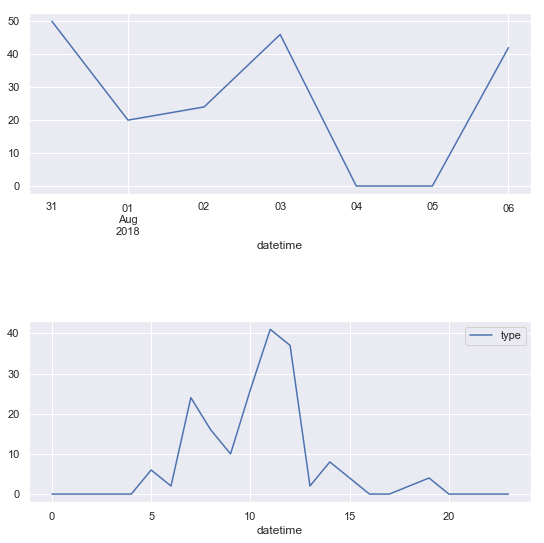

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.set()
plt.subplots_adjust(hspace = 0.7)
                                                                        #  'area'
# print histogram where one unit is a day                               #  'bar'
log42['type'].groupby(pd.Grouper(freq='1D')).count().plot(ax=axes[0], kind='line', figsize=(9, 9))

# print histogram where one unit is one hour
res = log42['type'].groupby(pd.Grouper(freq='1H')).count().reset_index()
res.groupby(res['datetime'].dt.hour).sum().plot(ax=axes[1], kind='line', figsize=(9, 9));

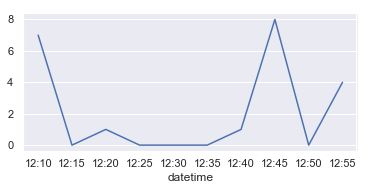

In [19]:
# print histogram in certain day where one unit is hour and narrow it to seconds interval
# using freq parameters: H, 5min, 30S, 5S
plt.figure()

log42_one_day = log42.loc['2018-08-06 12:00:00.000000':'2018-08-06 12:59:59.999999']
log42_one_day['type'].groupby(pd.Grouper(freq='5min')).count().plot(kind='line');
plt.subplots_adjust(bottom=0.4)

In [22]:
# Show freguent OLDS switches at certain period of time
print(log42.loc['2018-08-06 12:10:00.000000':'2018-08-06 12:15:59.999999']['imsid'])

datetime
2018-08-06 12:10:17.637857    IMSJ
2018-08-06 12:10:18.082100    IMSJ
2018-08-06 12:10:18.102242    IMSJ
2018-08-06 12:10:17.387149    IMSX
2018-08-06 12:10:17.444101    IMSX
2018-08-06 12:10:17.856128    IMSX
2018-08-06 12:10:17.934276    IMSX
Name: imsid, dtype: object


In [34]:
# take oen of the olds switches and give me events before the switch
events_before = df.loc[:'2018-08-06 12:10:17.637857']

# show last 20 events before the switch
print(events_before.iloc[-20:-1][['type','desc']])

# show me message contents before the log switch, x'03' log record is 'data put to mq buffer'
messages_before = events_before[events_before['type'] == '03']
for i in range(1,10):
    print(str(messages_before.iloc[-i].name)+' '+messages_before.iloc[-i]['blob'].decode('cp500')+'\n-----------')


                           type                                   desc
datetime                                                              
2018-08-06 12:10:17.587357   35        message enqueued or re-enqueued
2018-08-06 12:10:17.587386   31                GU issued for a message
2018-08-06 12:10:17.587420   36   message dequeued or saved or deleted
2018-08-06 12:10:17.587433   33        queue manager released a record
2018-08-06 12:10:17.589356   03           data put in mq buffer - DL/I
2018-08-06 12:10:17.589370   35        message enqueued or re-enqueued
2018-08-06 12:10:17.589384   03           data put in mq buffer - DL/I
2018-08-06 12:10:17.589396   35        message enqueued or re-enqueued
2018-08-06 12:10:17.589410   06  IMS started or stopped or FEOV issued
2018-08-06 12:10:17.589410   48         variable length padding record
2018-08-06 12:10:17.637738   03           data put in mq buffer - DL/I
2018-08-06 12:10:17.637740   31                GU issued for a message
2018-0